## Image classification fashion mnist datasets
- contains 70000 images
- image resolution is 28x28
#### Here
- 60000 image is for training and remaining 10000 is for test(evaluate) how model is accurately work or learn


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
print("tensorflow version", tf.__version__)

tensorflow version 2.18.0


In [11]:
## load the fashion mnist datasets
fashion_minst = tf.keras.datasets.fashion_mnist

(train_image, train_labels), (test_image, test_labels) = fashion_minst.load_data()

In [66]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',\
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
len(class_name)

10

## Explore the data

In [20]:
train_image.shape

(60000, 28, 28)

In [24]:
len(train_image)

60000

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
test_image.shape

(10000, 28, 28)

In [30]:
len(test_image)

10000

In [29]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Process the data

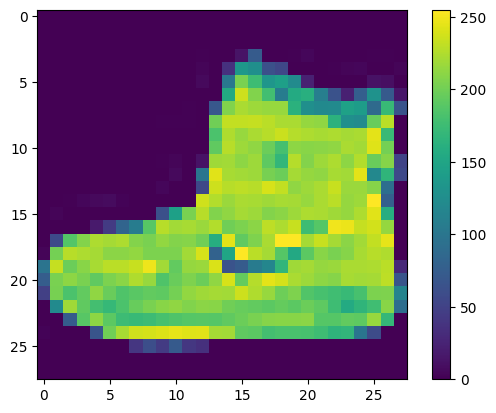

In [41]:
plt.figure()

plt.imshow(train_image[0])
plt.colorbar()
# plt.grid(True)
plt.grid(False)
plt.show()

In [42]:
## scale the values of the metrix
train_image = train_image/255
test_image = test_image/255

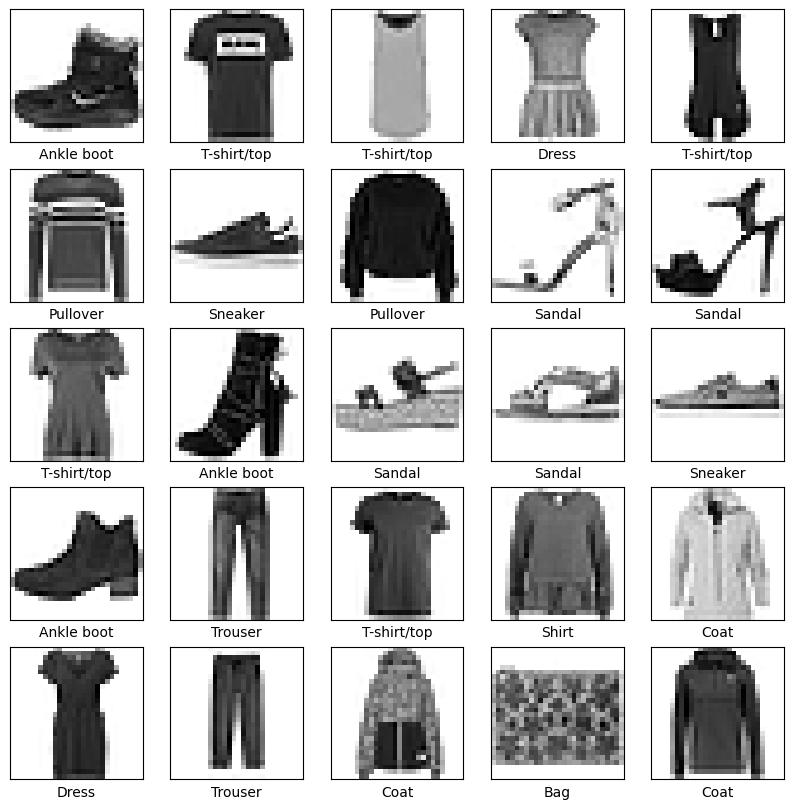

In [67]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])

plt.show()

## Build the model

In [71]:
input_shape = train_image[0].shape
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)

])

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
## compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
## train the model
history = model.fit(train_image,
                    train_labels,
                    epochs=10,
                    validation_data=(test_image, test_labels),
                    validation_split=0.25)

Epoch 1/10


2024-11-14 08:38:20.158346: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.6268

2024-11-14 08:38:23.999488: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7805 - loss: 0.6263 - val_accuracy: 0.8370 - val_loss: 0.4505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8621 - loss: 0.3837 - val_accuracy: 0.8638 - val_loss: 0.3826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.3415 - val_accuracy: 0.8664 - val_loss: 0.3681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8856 - loss: 0.3092 - val_accuracy: 0.8725 - val_loss: 0.3503
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8916 - loss: 0.2937 - val_accuracy: 0.8716 - val_loss: 0.3570
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8977 - loss: 0.2782 - val_accuracy: 0.8807 - val_loss: 0.3354
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8999 - loss: 0.2672 - val_accuracy: 0.8771 - val_loss: 0.3485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9058 - loss: 0.2554 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(test_image, test_labels, verbose=2)

2024-11-14 08:39:34.045903: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.3549


In [77]:
test_loss, test_acc

(0.35489970445632935, 0.8766999840736389)

In [78]:
train_loss, train_acc = model.evaluate(train_image, train_labels, verbose=2)
train_loss, train_acc

2024-11-14 08:40:39.015560: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 - 1s - 796us/step - accuracy: 0.9089 - loss: 0.2426


(0.24256913363933563, 0.9089000225067139)

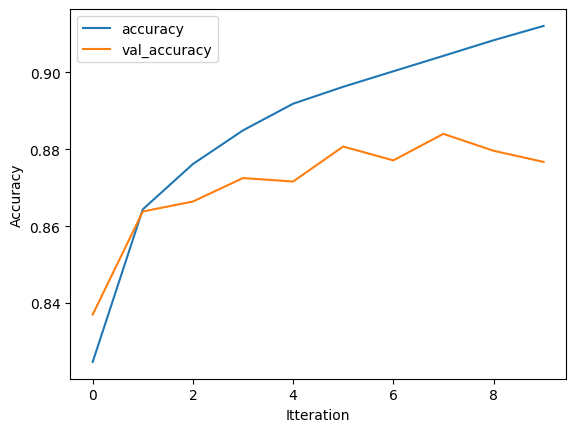

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Itteration')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

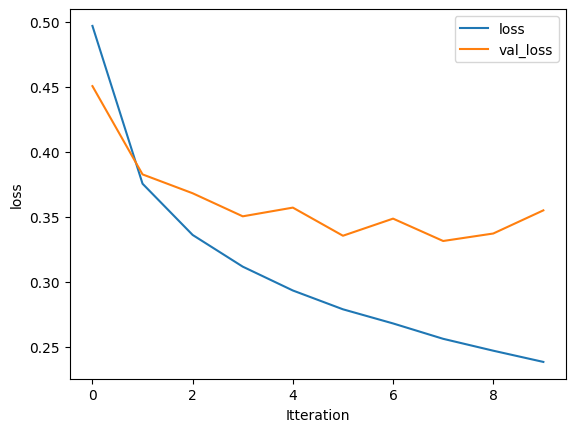

In [83]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Itteration')
plt.ylabel("loss")
plt.legend()
plt.show()

## Make predictions

In [85]:
probalility_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [87]:
prediction = probalility_model.predict(test_image)

171/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step

2024-11-14 08:46:25.042377: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


In [89]:
prediction[0]

array([1.1232801e-10, 2.1458058e-11, 8.2216433e-13, 4.7378511e-11,
       4.1406007e-11, 1.9328957e-02, 7.8320255e-08, 1.6363034e-02,
       2.9113019e-07, 9.6430755e-01], dtype=float32)

In [90]:
np.argmax(prediction[0])

np.int64(9)

In [91]:
test_labels[0]

np.uint8(9)

## define funtion to graph the full set of1 10 class preductions

In [122]:
def plot_image(i, prediction_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                         100*np.max(prediction_array),
                                         class_name[true_label]),
                                         color=color)
    


def plot_value_array(i, prediction_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)

    
    thisplot[predicted_label].set_color('red')
    thisplot['true_label'].set_color('blue')

TypeError: tuple indices must be integers or slices, not str

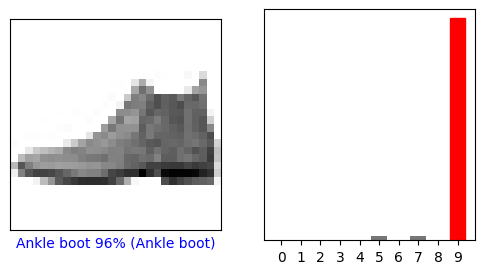

In [121]:
## verify predictions
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, prediction[i], test_labels, test_image)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction[i], test_labels)
plt.show()

TypeError: tuple indices must be integers or slices, not str

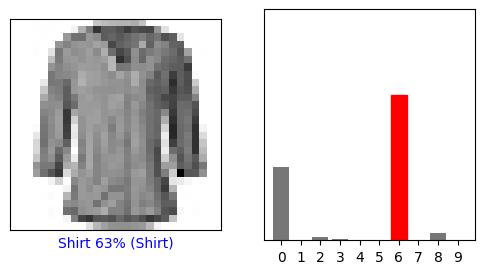

In [126]:
## verify predictions
i = 4
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, prediction[i], test_labels, test_image)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction[i], test_labels)
plt.show()

TypeError: tuple indices must be integers or slices, not str

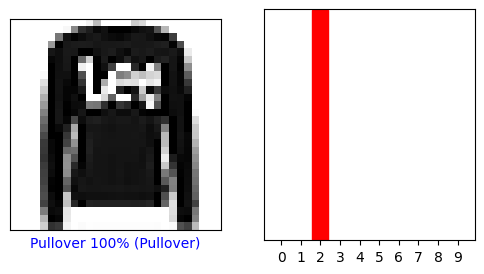

In [112]:
## verify predictions
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, prediction[i], test_labels, test_image)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction[i], test_labels)
plt.show()